In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("steering_data_with_voltage2.csv")

In [12]:
df

,Time (ms),Voltage1 (V),Voltage2 (V),Mode,Raw Value,Filtered Value
0,13579.0,2.50,2.50,Keyboard,306.0,310.33
1,13645.0,2.50,2.50,Keyboard,310.0,310.17
2,13662.0,2.50,2.50,Keyboard,301.0,309.83
3,13726.0,2.50,2.50,Keyboard,309.0,309.30
4,13775.0,2.50,2.50,Keyboard,309.0,308.79
...,...,...,...,...,...,...
827,54999.0,2.53,2.42,Manual,327.0,312.73
828,55046.0,2.56,2.40,Manual,332.0,317.69
829,55135.0,2.58,2.37,Manual,339.0,322.00
830,55145.0,2.61,2.35,Manual,321.0,325.60


In [13]:
df['Time (ms)'] = df['Time (ms)'] - df['Time (ms)'].iloc[0]

In [14]:
df

,Time (ms),Voltage1 (V),Voltage2 (V),Mode,Raw Value,Filtered Value
0,0.0,2.50,2.50,Keyboard,306.0,310.33
1,66.0,2.50,2.50,Keyboard,310.0,310.17
2,83.0,2.50,2.50,Keyboard,301.0,309.83
3,147.0,2.50,2.50,Keyboard,309.0,309.30
4,196.0,2.50,2.50,Keyboard,309.0,308.79
...,...,...,...,...,...,...
827,41420.0,2.53,2.42,Manual,327.0,312.73
828,41467.0,2.56,2.40,Manual,332.0,317.69
829,41556.0,2.58,2.37,Manual,339.0,322.00
830,41566.0,2.61,2.35,Manual,321.0,325.60


In [15]:
df.to_csv("steering_data_with_voltage2.csv", index=False)

## STOP

In [16]:
df = pd.read_csv("steering_data_with_voltage2.csv")
df 

,Time (ms),Voltage1 (V),Voltage2 (V),Mode,Raw Value,Filtered Value
0,0.0,2.50,2.50,Keyboard,306.0,310.33
1,66.0,2.50,2.50,Keyboard,310.0,310.17
2,83.0,2.50,2.50,Keyboard,301.0,309.83
3,147.0,2.50,2.50,Keyboard,309.0,309.30
4,196.0,2.50,2.50,Keyboard,309.0,308.79
...,...,...,...,...,...,...
827,41420.0,2.53,2.42,Manual,327.0,312.73
828,41467.0,2.56,2.40,Manual,332.0,317.69
829,41556.0,2.58,2.37,Manual,339.0,322.00
830,41566.0,2.61,2.35,Manual,321.0,325.60


In [17]:
# Convert Brake State to numerical values (1 for RELEASED, 0 for APPLIED)
df['Mode Numerical'] = df['Mode'].apply(lambda x: 1 if x == 'Keyboard' else 0)
df

,Time (ms),Voltage1 (V),Voltage2 (V),Mode,Raw Value,Filtered Value,Mode Numerical
0,0.0,2.50,2.50,Keyboard,306.0,310.33,1
1,66.0,2.50,2.50,Keyboard,310.0,310.17,1
2,83.0,2.50,2.50,Keyboard,301.0,309.83,1
3,147.0,2.50,2.50,Keyboard,309.0,309.30,1
4,196.0,2.50,2.50,Keyboard,309.0,308.79,1
...,...,...,...,...,...,...,...
827,41420.0,2.53,2.42,Manual,327.0,312.73,0
828,41467.0,2.56,2.40,Manual,332.0,317.69,0
829,41556.0,2.58,2.37,Manual,339.0,322.00,0
830,41566.0,2.61,2.35,Manual,321.0,325.60,0


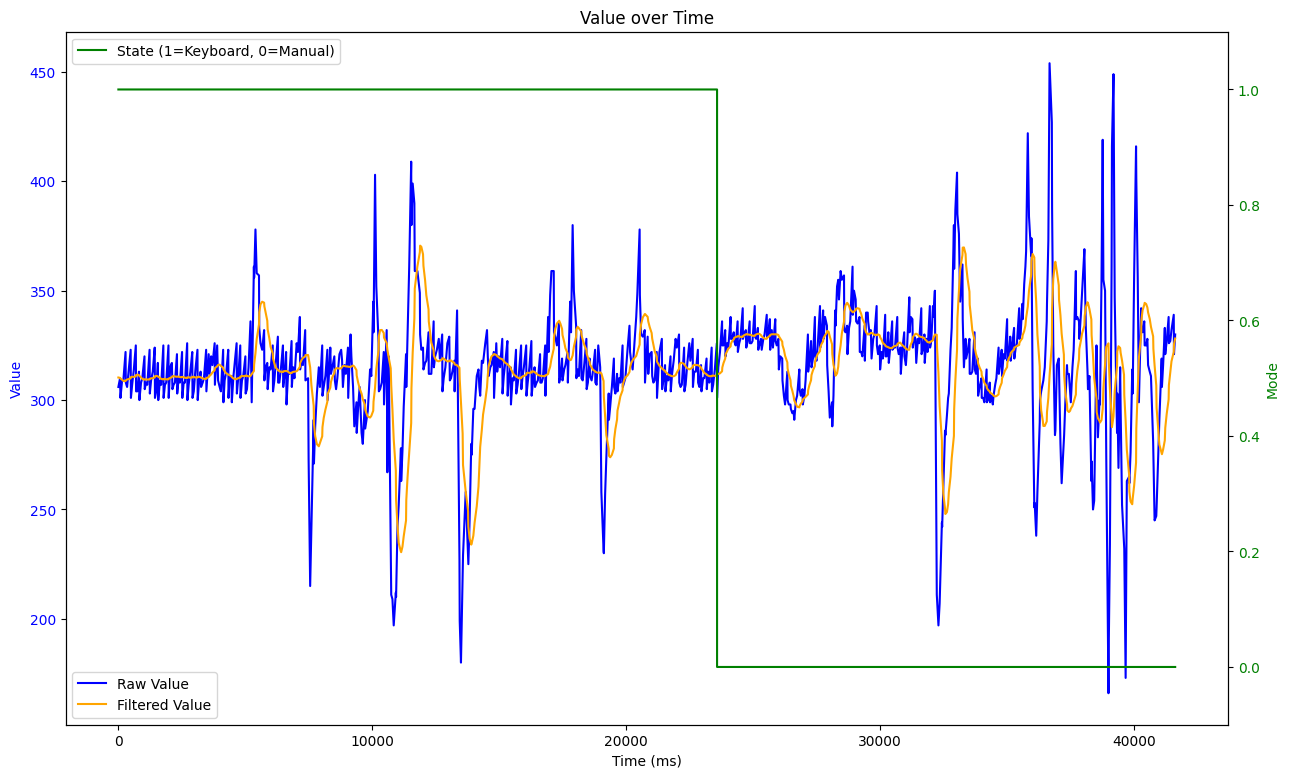

In [31]:
# Create the plot
fig, ax1 = plt.subplots()
# Set the figure size
fig.set_size_inches(10*1.5, 6*1.5)

# Plot Raw Distance and Filtered Distance on the primary y-axis
ax1.plot(df['Time (ms)'], df['Raw Value'], label='Raw Value', color='blue')
ax1.plot(df['Time (ms)'], df['Filtered Value'], label='Filtered Value', color='orange')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower left')

# Create a secondary y-axis for Brake State
ax2 = ax1.twinx()
ax2.step(df['Time (ms)'], df['Mode Numerical'], label='State (1=Keyboard, 0=Manual)', color='green', where='post')
ax2.set_ylabel('Mode', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(-0.1, 1.1)  # Set limits to make the step plot clearer
ax2.legend(loc='upper left')

# Show the plot
plt.title('Value over Time')
plt.show()

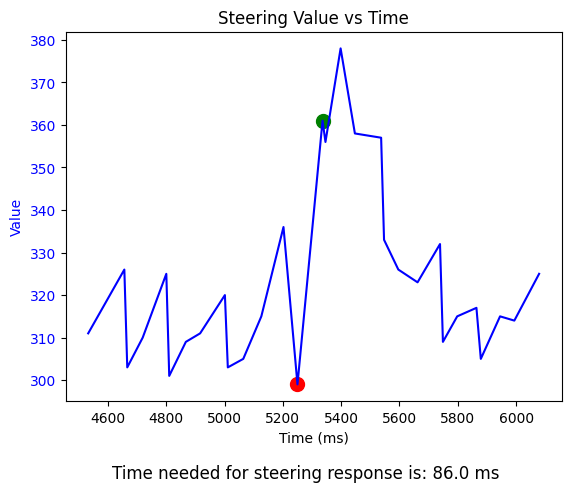

In [30]:
# Subset the data from index 75 to 84
fig, ax = plt.subplots()
df_subset = df.iloc[90:120]  # This is already done in your code

# Plot Raw Distance
ax.plot(df_subset['Time (ms)'], df_subset['Raw Value'], label='Raw Value', color='blue')

# Add dots at index 75 and 84
ax.scatter(df_subset['Time (ms)'].iloc[13], df_subset['Raw Value'].iloc[13], color='red', s=100, label='Index 75')
ax.scatter(df_subset['Time (ms)'].iloc[-16], df_subset['Raw Value'].iloc[-16], color='green', s=100, label='Index 84')

# Set labels for the primary y-axis
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Value', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Add title
# Extract and print the exact time at index 75 and 84
time_at_75 = df_subset['Time (ms)'].iloc[13]
time_at_84 = df_subset['Time (ms)'].iloc[-16]
plt.title(f"Steering Value vs Time")
# Add the time difference text below the figure
plt.figtext(0.5, -0.05, f"Time needed for steering response is: {time_at_84 - time_at_75} ms", ha='center', fontsize=12)
# Show the plot
plt.show()

## SPEED 10 KPH

In [23]:
df = pd.read_csv("brake_data_with_speed10.csv")
df 

,Time (ms),Raw Distance (mm),Filtered Distance (mm),Speed (KPH),Brake State
0,0.0,53.0,53.04,1.230814,RELEASED
1,107.0,55.0,53.03,1.230814,RELEASED
2,214.0,60.0,53.11,1.230814,RELEASED
3,321.0,59.0,53.34,1.230814,RELEASED
4,428.0,60.0,53.71,1.230814,RELEASED
...,...,...,...,...,...
100,10733.0,108.0,70.50,0.000000,RELEASED
101,10840.0,110.0,76.99,0.000000,RELEASED
102,10947.0,106.0,82.94,1.307371,RELEASED
103,11054.0,109.0,88.28,1.447606,RELEASED


In [25]:
# Convert Brake State to numerical values (1 for RELEASED, 0 for APPLIED)
df['Brake State Numerical'] = df['Brake State'].apply(lambda x: 1 if x == 'RELEASED' else 0)
df

,Time (ms),Raw Distance (mm),Filtered Distance (mm),Speed (KPH),Brake State,Brake State Numerical
0,0.0,53.0,53.04,1.230814,RELEASED,1
1,107.0,55.0,53.03,1.230814,RELEASED,1
2,214.0,60.0,53.11,1.230814,RELEASED,1
3,321.0,59.0,53.34,1.230814,RELEASED,1
4,428.0,60.0,53.71,1.230814,RELEASED,1
...,...,...,...,...,...,...
100,10733.0,108.0,70.50,0.000000,RELEASED,1
101,10840.0,110.0,76.99,0.000000,RELEASED,1
102,10947.0,106.0,82.94,1.307371,RELEASED,1
103,11054.0,109.0,88.28,1.447606,RELEASED,1


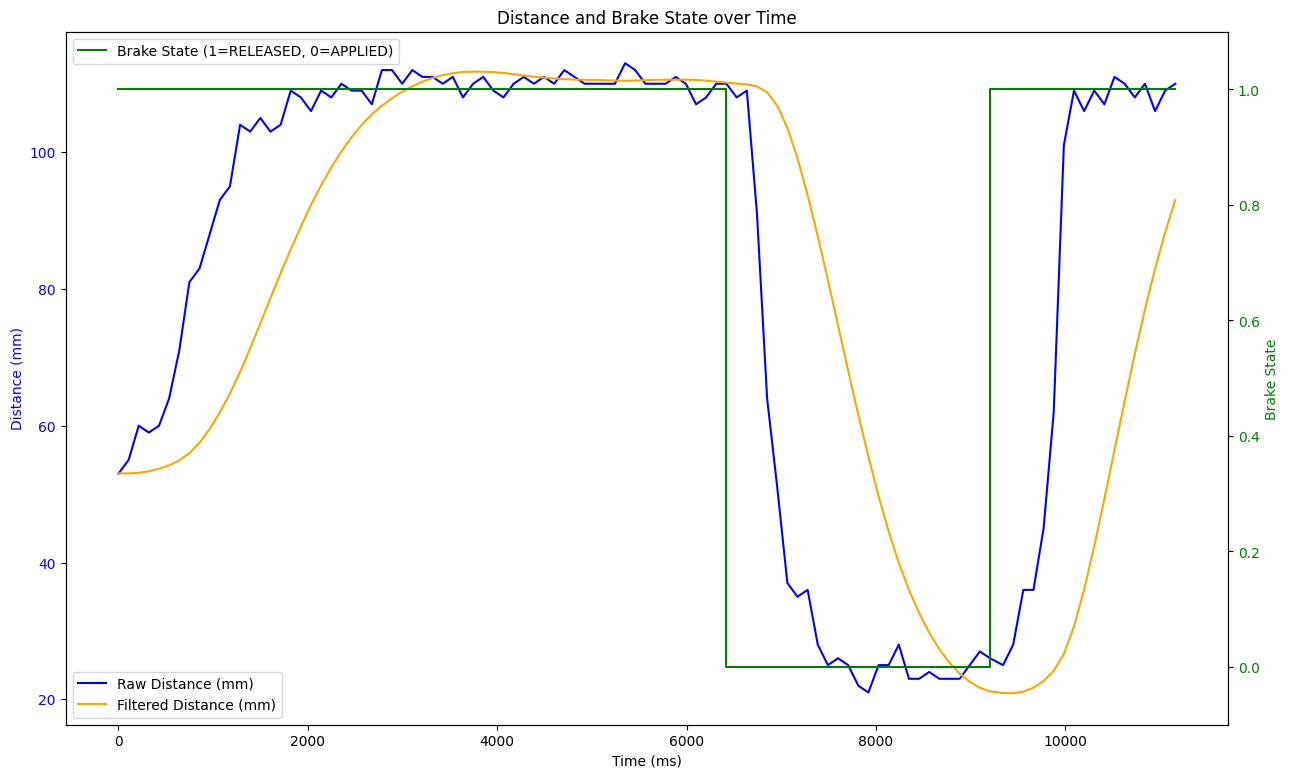

In [26]:
# Create the plot
fig, ax1 = plt.subplots()
# Set the figure size
fig.set_size_inches(10*1.5, 6*1.5)

# Plot Raw Distance and Filtered Distance on the primary y-axis
ax1.plot(df['Time (ms)'], df['Raw Distance (mm)'], label='Raw Distance (mm)', color='blue')
ax1.plot(df['Time (ms)'], df['Filtered Distance (mm)'], label='Filtered Distance (mm)', color='orange')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Distance (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower left')

# Create a secondary y-axis for Brake State
ax2 = ax1.twinx()
ax2.step(df['Time (ms)'], df['Brake State Numerical'], label='Brake State (1=RELEASED, 0=APPLIED)', color='green', where='post')
ax2.set_ylabel('Brake State', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(-0.1, 1.1)  # Set limits to make the step plot clearer
ax2.legend(loc='upper left')

# Show the plot
plt.title('Distance and Brake State over Time')
plt.show()

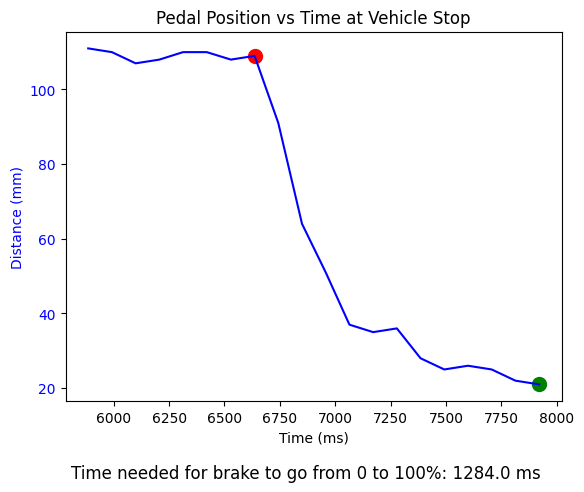

In [34]:
# Subset the data from index 75 to 84
fig, ax = plt.subplots()
df_subset = df.iloc[55:75]  # This is already done in your code

# Plot Raw Distance
ax.plot(df_subset['Time (ms)'], df_subset['Raw Distance (mm)'], label='Raw Distance (mm)', color='blue')

# Add dots at index 75 and 84
ax.scatter(df_subset['Time (ms)'].iloc[7], df_subset['Raw Distance (mm)'].iloc[7], color='red', s=100, label='Index 75')
ax.scatter(df_subset['Time (ms)'].iloc[-1], df_subset['Raw Distance (mm)'].iloc[-1], color='green', s=100, label='Index 84')

# Set labels for the primary y-axis
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Distance (mm)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Add title
# Extract and print the exact time at index 75 and 84
time_at_75 = df_subset['Time (ms)'].iloc[7]
time_at_84 = df_subset['Time (ms)'].iloc[-1]
plt.title(f"Pedal Position vs Time at Vehicle Stop")
# Add the time difference text below the figure
plt.figtext(0.5, -0.05, f"Time needed for brake to go from 0 to 100%: {time_at_84 - time_at_75} ms", ha='center', fontsize=12)
# Show the plot
plt.show()

## SPEED 40 KPH

In [7]:
df = pd.read_csv("brake_data_with_speed40.csv")

In [8]:
df

,Time (ms),Raw Distance (mm),Filtered Distance (mm),Brake Position (%),Speed (KPH),Brake State
0,0.0,58.0,55.40,0.0,3.444799,RELEASED
1,107.0,55.0,55.64,0.0,3.444799,RELEASED
2,214.0,54.0,55.81,0.0,3.444799,RELEASED
3,321.0,53.0,55.89,0.0,3.444799,RELEASED
4,428.0,55.0,55.88,0.0,3.444799,RELEASED
...,...,...,...,...,...,...
164,17593.0,99.0,88.95,0.0,0.000000,RELEASED
165,17700.0,101.0,91.59,0.0,0.000000,RELEASED
166,17807.0,106.0,93.92,0.0,0.000000,RELEASED
167,17914.0,103.0,96.03,0.0,0.000000,RELEASED


In [23]:
# Convert Brake State to numerical values (1 for RELEASED, 0 for APPLIED)
df['Brake State Numerical'] = df['Brake State'].apply(lambda x: 1 if x == 'RELEASED' else 0)
df

,Time (ms),Raw Distance (mm),Filtered Distance (mm),Brake Position (%),Speed (KPH),Brake State,Brake State Numerical
0,0.0,58.0,55.40,0.0,3.444799,RELEASED,1
1,107.0,55.0,55.64,0.0,3.444799,RELEASED,1
2,214.0,54.0,55.81,0.0,3.444799,RELEASED,1
3,321.0,53.0,55.89,0.0,3.444799,RELEASED,1
4,428.0,55.0,55.88,0.0,3.444799,RELEASED,1
...,...,...,...,...,...,...,...
164,17593.0,99.0,88.95,0.0,0.000000,RELEASED,1
165,17700.0,101.0,91.59,0.0,0.000000,RELEASED,1
166,17807.0,106.0,93.92,0.0,0.000000,RELEASED,1
167,17914.0,103.0,96.03,0.0,0.000000,RELEASED,1


In [24]:
df.drop(columns=['Brake Position (%)'], inplace=True)
df.to_csv("brake_data_with_speed40.csv", index=False)

### Read

In [27]:
df = pd.read_csv("brake_data_with_speed40.csv")
df

,Time (ms),Raw Distance (mm),Filtered Distance (mm),Speed (KPH),Brake State,Brake State Numerical
0,0.0,58.0,55.40,3.444799,RELEASED,1
1,107.0,55.0,55.64,3.444799,RELEASED,1
2,214.0,54.0,55.81,3.444799,RELEASED,1
3,321.0,53.0,55.89,3.444799,RELEASED,1
4,428.0,55.0,55.88,3.444799,RELEASED,1
...,...,...,...,...,...,...
164,17593.0,99.0,88.95,0.000000,RELEASED,1
165,17700.0,101.0,91.59,0.000000,RELEASED,1
166,17807.0,106.0,93.92,0.000000,RELEASED,1
167,17914.0,103.0,96.03,0.000000,RELEASED,1


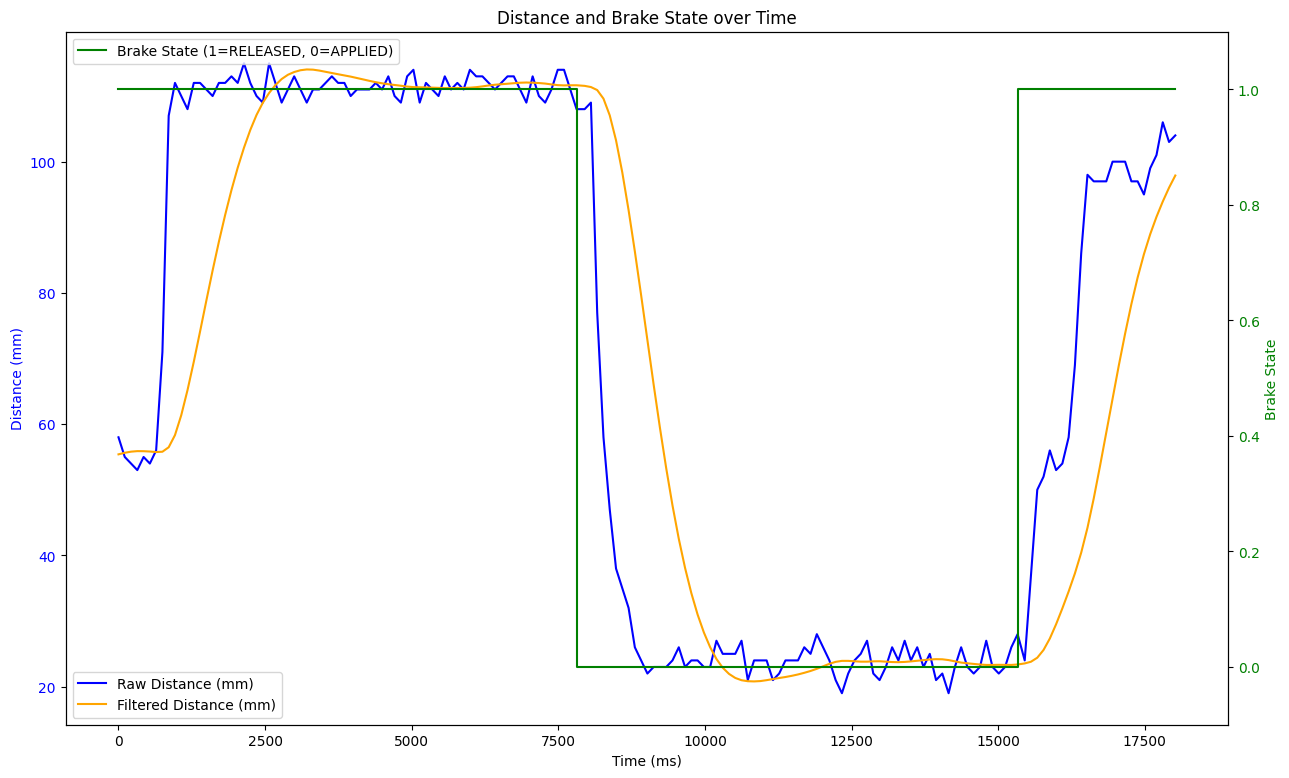

In [28]:
# Create the plot
fig, ax1 = plt.subplots()
# Set the figure size
fig.set_size_inches(10*1.5, 6*1.5)

# Plot Raw Distance and Filtered Distance on the primary y-axis
ax1.plot(df['Time (ms)'], df['Raw Distance (mm)'], label='Raw Distance (mm)', color='blue')
ax1.plot(df['Time (ms)'], df['Filtered Distance (mm)'], label='Filtered Distance (mm)', color='orange')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Distance (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower left')

# Create a secondary y-axis for Brake State
ax2 = ax1.twinx()
ax2.step(df['Time (ms)'], df['Brake State Numerical'], label='Brake State (1=RELEASED, 0=APPLIED)', color='green', where='post')
ax2.set_ylabel('Brake State', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(-0.1, 1.1)  # Set limits to make the step plot clearer
ax2.legend(loc='upper left')

# Show the plot
plt.title('Distance and Brake State over Time')
plt.show()

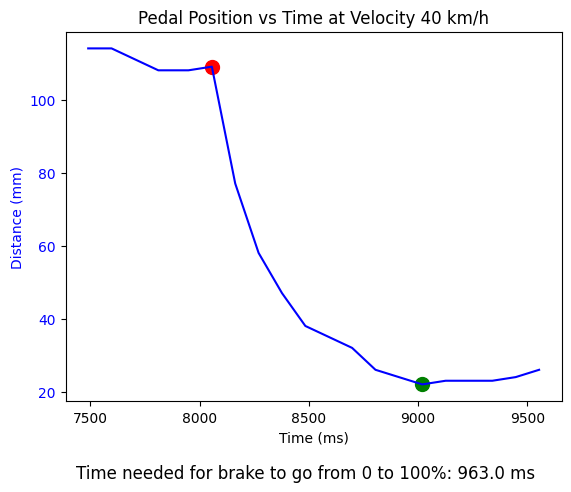

In [48]:
# Subset the data from index 75 to 84
fig, ax = plt.subplots()
df_subset = df.iloc[70:90]  # This is already done in your code

# Plot Raw Distance
ax.plot(df_subset['Time (ms)'], df_subset['Raw Distance (mm)'], label='Raw Distance (mm)', color='blue')

# Add dots at index 75 and 84
ax.scatter(df_subset['Time (ms)'].iloc[5], df_subset['Raw Distance (mm)'].iloc[5], color='red', s=100, label='Index 75')
ax.scatter(df_subset['Time (ms)'].iloc[-6], df_subset['Raw Distance (mm)'].iloc[-6], color='green', s=100, label='Index 84')

# Set labels for the primary y-axis
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Distance (mm)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Add title
# Extract and print the exact time at index 75 and 84
time_at_75 = df_subset['Time (ms)'].iloc[5]
time_at_84 = df_subset['Time (ms)'].iloc[-6]
plt.title(f"Pedal Position vs Time at Velocity 40 km/h")
# Add the time difference text below the figure
plt.figtext(0.5, -0.05, f"Time needed for brake to go from 0 to 100%: {time_at_84 - time_at_75} ms", ha='center', fontsize=12)
# Show the plot
plt.show()

## STOP